##### python imports

In [55]:
import pandas as pd
import numpy as np

### Lecture 1 - Reading In Data With read_csv()

In [2]:
pd.read_csv('data/drinks.csv')

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,NaN,NaN,NaN,NaN
1,Albania,89.0,132.0,54.0,4.9
2,Algeria,25.0,NaN,14.0,0.7
3,Andorra,245.0,138.0,312.0,12.4
4,Angola,217.0,57.0,45.0,5.9
...,...,...,...,...,...
188,Venezuela,333.0,1.0,3.0,7.7
189,Vietnam,111.0,2.0,1.0,2.0
190,Yemen,6.0,NaN,NaN,0.1
191,Zambia,32.0,19.0,4.0,2.5


In [3]:
# can specify which cols you want to get from the dataFrame
pd.read_csv('data/drinks.csv', usecols=['country', 'wine_servings'])

,country,wine_servings
0,Afghanistan,NaN
1,Albania,54.0
2,Algeria,14.0
3,Andorra,312.0
4,Angola,45.0
...,...,...
188,Venezuela,3.0
189,Vietnam,1.0
190,Yemen,NaN
191,Zambia,4.0


In [6]:
# also you can select a index
alcohol = pd.read_csv('data/drinks.csv', usecols=['country', 'wine_servings'], index_col='country')

In [7]:
alcohol.head()

,wine_servings
country,
Afghanistan,NaN
Albania,54.0
Algeria,14.0
Andorra,312.0
Angola,45.0


In [8]:
# this not a Series yet
type(alcohol)

pandas.core.frame.DataFrame

In [9]:
# lets see how to make it Series with squeeze attribute
alcohol = pd.read_csv('data/drinks.csv', usecols=['country', 'wine_servings'], index_col='country', squeeze=True)

In [11]:
alcohol.head()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
Name: wine_servings, dtype: float64

In [12]:
type(alcohol)

pandas.core.series.Series

### Lecture 2 - Series Sizing With .size, .shape, And len()

In [13]:
alcohol.size

193

In [14]:
alcohol.values

array([ nan,  54.,  14., 312.,  45.,  45., 221.,  11., 212., 191.,   5.,
        51.,   7.,  nan,  36.,  42., 212.,   8.,  13.,  nan,   8.,   8.,
        35.,  16.,   1.,  94.,   7.,  nan,   7.,  16.,   1.,   4.,   1.,
         1.,   1., 172.,   8.,   3.,   1.,   9.,  74.,  11., 254.,   5.,
       113., 134.,  nan,   1., 278.,   3.,  26.,   9.,   3.,   1.,   2.,
       233.,  nan,  59.,  nan,   1.,  97.,  37.,  59.,   1., 149., 175.,
         1., 218.,  28.,   2.,   2.,  21.,   1.,   1.,   2., 185.,  78.,
        nan,  nan,  nan,  nan, 165.,   9., 237.,   9.,  16.,   1.,  12.,
         2.,   1.,  nan,   6., 123.,  62.,  31.,  nan,   2.,  nan,  56.,
       271.,   4.,   1.,  nan,  nan,   1.,  12.,  nan,  nan,  18.,   5.,
        18.,  nan,   8., 128.,   1.,   5.,  nan,   1.,   8.,  nan,  19.,
       175.,   1.,   1.,   2.,   7., 129.,   1.,  nan,  23.,  18.,   1.,
        74.,  21.,   1.,  56., 339.,   7.,   9.,  18., 167.,  73.,  nan,
        32.,  71.,  11.,  24.,  nan,  14.,  nan,   

In [15]:
alcohol.index

Index(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua & Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Tanzania', 'USA', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela',
       'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'],
      dtype='object', name='country', length=193)

In [16]:
alcohol.values.size == alcohol.index.size

True

In [17]:
alcohol.shape

(193,)

In [18]:
alcohol.size == alcohol.shape[0]

True

In [19]:
len(alcohol)

193

### Lecture 3 - Unique Values And Series Monotonicity

In [20]:
# return a bool for unique
alcohol.is_unique

False

In [21]:
# if we get only first five elements - we have unique elements
alcohol.head().is_unique

True

In [25]:
# get number of unique elemtas exclude nan
alcohol.nunique()

71

In [26]:
# get number of unique elemtas include nan
alcohol.nunique(dropna=False)

72

In [29]:
# monotonicity - is_monotonic is alies to is_monotonic_increasing
pd.Series([1, 2, 3]).is_monotonic

True

In [33]:
pd.Series([1, 2, 3, 1]).is_monotonic_increasing

False

In [37]:
# also ther is decreasing
pd.Series(reversed([1, 2, 3])).is_monotonic_decreasing

True

### Lecture 4 -The count() Method

In [38]:
# return count with no nan values
alcohol.count()

162

In [39]:
alcohol.size

193

In [40]:
# we see that we have nan vas from prev two cells, but there is one more way to check that
alcohol.hasnans

True

### Lecture 5 - Accessing And Counting NAs

In [54]:
# get bool answer to that is there a nan (isnull == isna)
alcohol.isnull()

country
Afghanistan     True
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam        False
Yemen           True
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [46]:
# get only nan
alcohol.loc[alcohol.isnull()]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [48]:
# get all indesies (countries) with nan
alcohol.loc[alcohol.isnull()].index

Index(['Afghanistan', 'Bangladesh', 'Bhutan', 'Burundi', 'North Korea',
       'Eritrea', 'Ethiopia', 'India', 'Indonesia', 'Iran', 'Iraq', 'Kuwait',
       'Lesotho', 'Libya', 'Malaysia', 'Maldives', 'Marshall Islands',
       'Mauritania', 'Monaco', 'Myanmar', 'Nepal', 'Pakistan', 'Rwanda',
       'San Marino', 'Saudi Arabia', 'Somalia', 'Sri Lanka', 'Sudan',
       'Tajikistan', 'Uganda', 'Yemen'],
      dtype='object', name='country')

In [49]:
# get python list of the prev result
list(alcohol.loc[alcohol.isnull()].index)

['Afghanistan',
 'Bangladesh',
 'Bhutan',
 'Burundi',
 'North Korea',
 'Eritrea',
 'Ethiopia',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Kuwait',
 'Lesotho',
 'Libya',
 'Malaysia',
 'Maldives',
 'Marshall Islands',
 'Mauritania',
 'Monaco',
 'Myanmar',
 'Nepal',
 'Pakistan',
 'Rwanda',
 'San Marino',
 'Saudi Arabia',
 'Somalia',
 'Sri Lanka',
 'Sudan',
 'Tajikistan',
 'Uganda',
 'Yemen']

In [50]:
# long way to get the count of all nan
len(list(alcohol.loc[alcohol.isnull()].index))

31

In [51]:
# short and right way to get the count with pandas
alcohol.isnull().sum()
# this work couse bools in python are ints, lets see it in the next cell

31

In [52]:
sum([True, False, True, False])

2

In [53]:
# there is another wat to show nans count
all = alcohol.size
not_nans = alcohol.count()
nans = alcohol.isnull().sum()
all == not_nans+nans

True

### BONUS: Another Approach

In [56]:
# ufunc -> universal function
np.isnan

<ufunc 'isnan'>

In [58]:
ser = pd.Series(data=[True, False, None, 2], dtype=float)

In [59]:
np.isnan(ser)

0    False
1    False
2     True
3    False
dtype: bool

In [63]:
# get the same result like in the prev cells
alcohol[np.isnan]

country
Afghanistan        NaN
Bangladesh         NaN
Bhutan             NaN
Burundi            NaN
North Korea        NaN
Eritrea            NaN
Ethiopia           NaN
India              NaN
Indonesia          NaN
Iran               NaN
Iraq               NaN
Kuwait             NaN
Lesotho            NaN
Libya              NaN
Malaysia           NaN
Maldives           NaN
Marshall Islands   NaN
Mauritania         NaN
Monaco             NaN
Myanmar            NaN
Nepal              NaN
Pakistan           NaN
Rwanda             NaN
San Marino         NaN
Saudi Arabia       NaN
Somalia            NaN
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, dtype: float64

In [62]:
# and when use np and pd can get count of nans :)
alcohol[np.isnan].size

31

### Lecture 6 - The Other Side: notnull() And notna()

In [64]:
# the oposite of isnull, isna
alcohol.notnull()

country
Afghanistan    False
Albania         True
Algeria         True
Andorra         True
Angola          True
               ...  
Venezuela       True
Vietnam         True
Yemen          False
Zambia          True
Zimbabwe        True
Name: wine_servings, Length: 193, dtype: bool

In [65]:
alcohol.loc[alcohol.notnull()]

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [66]:
alcohol.notna().sum()

162

### BONUS: Booleans Are Literally Numbers In Python

In [67]:
True + 19

20

In [68]:
True + False + 3 + True

5

In [70]:
type(True)

bool

In [69]:
bool.__mro__

(bool, int, object)

### Lecture 7 - Skill Challenge

In [77]:
# 1. Isolate hte non-nulls in the alcohol series
# and assign them to the veriable wine_servings
wine_servings = alcohol.loc[alcohol.notna()]
wine_servings

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [79]:
# 2. What is the total wine consumed by all countries in wine_servings?
wine_servings.sum()

8221.0

In [82]:
# 3. In the wine_servings dataset, what was the wine consumed by
# countries that consumed less than 100 servings?
# HINT: apply a boolean mask to identify such countries, then sum()
wine_servings.loc[(wine_servings < 100)].sum()

2416.0

### Lecture 8 - Dropping And Filling NAs

In [83]:
# drop nans from the Series (just make copy to the original data)
alcohol.dropna()

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [84]:
alcohol

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

In [86]:
# one way to make new Series is to assign to a new or the same variable
alcohol_notnull = alcohol.dropna()
alcohol_notnull

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [88]:
# second way sis to use inplace = True to the same var
# we will not do it to not loose the original data
alcohol.dropna(inplace=False)

country
Albania               54.0
Algeria               14.0
Andorra              312.0
Angola                45.0
Antigua & Barbuda     45.0
                     ...  
Vanuatu               11.0
Venezuela              3.0
Vietnam                1.0
Zambia                 4.0
Zimbabwe               4.0
Name: wine_servings, Length: 162, dtype: float64

In [91]:
# also we can fill nans with vals where we want
alcohol.fillna(100, inplace=False)

country
Afghanistan    100.0
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen          100.0
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Lecture 9 - Descriptive Statistics

In [93]:
# average
alcohol.sum() / alcohol.count()

50.74691358024691

In [94]:
# there is a method for average
alcohol.mean()

50.74691358024691

In [96]:
# what is median
alcohol.median()

11.5

In [98]:
# another way to take median
alcohol.quantile(q=.5)

11.5

<AxesSubplot:>

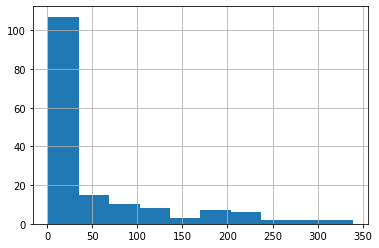

In [99]:
alcohol.hist()

In [102]:
# IQR
iqr = alcohol.quantile(q=.75)-alcohol.quantile(q=.25)
iqr

58.25

In [103]:
alcohol.min()

1.0

In [104]:
alcohol.max()

339.0

In [105]:
# standart deviation is a square root of the variance
alcohol.std()

76.13491716376171

In [106]:
# variance
alcohol.var()

5796.5256115328575

In [107]:
alcohol.std()**2 == alcohol.var()

True

### Lecture 10 - The describe() Method

In [110]:
alcohol.describe()

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
25%        3.000000
50%       11.500000
75%       61.250000
max      339.000000
Name: wine_servings, dtype: float64

In [113]:
alcohol.describe(percentiles=[.79, .19])

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

In [114]:
alcohol.describe(percentiles=[.79, .19], include=float, exclude=object)

count    162.000000
mean      50.746914
std       76.134917
min        1.000000
19%        2.000000
50%       11.500000
79%       81.570000
max      339.000000
Name: wine_servings, dtype: float64

### Lecture 11 - mode() And value_counts()

In [115]:
# this is the pic of the data
alcohol.mode()

0    1.0
dtype: float64

In [116]:
# create a bool for a bool mask
alcohol == 1

country
Afghanistan    False
Albania        False
Algeria        False
Andorra        False
Angola         False
               ...  
Venezuela      False
Vietnam         True
Yemen          False
Zambia         False
Zimbabwe       False
Name: wine_servings, Length: 193, dtype: bool

In [119]:
# count all countries with pick of a 1 serving with bool mask
alcohol.loc[alcohol == 1].size

28

In [121]:
# values counts shows how many of a value is in the dataSet
alcohol.value_counts()

1.0      28
2.0      10
7.0       9
8.0       7
5.0       6
         ..
218.0     1
185.0     1
78.0      1
165.0     1
22.0      1
Name: wine_servings, Length: 71, dtype: int64

In [122]:
alcohol.value_counts().iloc[0]

28

In [125]:
# with normalize we get the relative freq (in %)
alcohol.value_counts(normalize=True)

1.0      0.172840
2.0      0.061728
7.0      0.055556
8.0      0.043210
5.0      0.037037
           ...   
218.0    0.006173
185.0    0.006173
78.0     0.006173
165.0    0.006173
22.0     0.006173
Name: wine_servings, Length: 71, dtype: float64

In [126]:
28/162

0.1728395061728395

### Lecture 12 - idxmax() And idxmin()

In [130]:
# get countries (index) with max value
alcohol.loc[alcohol == alcohol.max()].index[0]

'Portugal'

In [131]:
# easyest way is to use idxmax()
alcohol.idxmax()

'Portugal'

In [132]:
# the oposite is idxmin()
alcohol.idxmin()

'Brunei'

In [133]:
# but that is not the only one value with that result
alcohol.loc[alcohol == alcohol.min()]

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Ghana                       1.0
Guyana                      1.0
Haiti                       1.0
Jordan                      1.0
Kiribati                    1.0
Malawi                      1.0
Mali                        1.0
Morocco                     1.0
Namibia                     1.0
Nicaragua                   1.0
Niger                       1.0
Oman                        1.0
Papua New Guinea            1.0
Philippines                 1.0
Solomon Islands             1.0
Thailand                    1.0
Tanzania                    1.0
Vietnam                     1.0
Name: wine_servings, dtype: float64

In [135]:
# with this way we will get the value, not the index
alcohol.loc[alcohol.idxmin()]

1.0

### Lecture 13 - Sorting With sort_values()

In [136]:
# sort by values
alcohol.sort_values()

country
Thailand           1.0
Solomon Islands    1.0
Brunei             1.0
Haiti              1.0
Cambodia           1.0
                  ... 
Sri Lanka          NaN
Sudan              NaN
Tajikistan         NaN
Uganda             NaN
Yemen              NaN
Name: wine_servings, Length: 193, dtype: float64

In [137]:
# sorting
alcohol.sort_values(ascending=False)

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

In [138]:
# nan position
alcohol.sort_values(na_position='first')

country
Afghanistan      NaN
Bangladesh       NaN
Bhutan           NaN
Burundi          NaN
North Korea      NaN
               ...  
Luxembourg     271.0
Slovenia       276.0
Denmark        278.0
Andorra        312.0
Portugal       339.0
Name: wine_servings, Length: 193, dtype: float64

In [139]:
# specify sorting algorithm (def -> quicksort)
alcohol.sort_values(ascending=False, na_position='last', kind='margesort') # heapsort

country
Portugal      339.0
Andorra       312.0
Denmark       278.0
Slovenia      276.0
Luxembourg    271.0
              ...  
Sri Lanka       NaN
Sudan           NaN
Tajikistan      NaN
Uganda          NaN
Yemen           NaN
Name: wine_servings, Length: 193, dtype: float64

### Lecture 14 - nlargest() And nsmallest()

In [143]:
# get specified largest values
alcohol.nlargest(n=10)

country
Portugal             339.0
Andorra              312.0
Denmark              278.0
Slovenia             276.0
Luxembourg           271.0
Croatia              254.0
Italy                237.0
Equatorial Guinea    233.0
Argentina            221.0
Greece               218.0
Name: wine_servings, dtype: float64

In [142]:
# get specified smallest values
alcohol.nsmallest(10)

country
Brunei                      1.0
Cambodia                    1.0
Canada                      1.0
Central African Republic    1.0
Chad                        1.0
Comoros                     1.0
DR Congo                    1.0
Egypt                       1.0
Fiji                        1.0
Gambia                      1.0
Name: wine_servings, dtype: float64

### Lecture 15 - Sorting With sort_index()

In [144]:
# the params are the same like in the sort_values()
alcohol.sort_index()

country
Afghanistan      NaN
Albania         54.0
Algeria         14.0
Andorra        312.0
Angola          45.0
               ...  
Venezuela        3.0
Vietnam          1.0
Yemen            NaN
Zambia           4.0
Zimbabwe         4.0
Name: wine_servings, Length: 193, dtype: float64

### Lecture 16 - Skill Challenge

In [149]:
# 1. Select all the countries from alcohol that have more than
# 50 wine servings, and save them (and the corresponding values)
# in a variable fifty_plus
fifty_plus = alcohol.loc[alcohol > 50]
fifty_plus

country
Albania                54.0
Andorra               312.0
Argentina             221.0
Australia             212.0
Austria               191.0
Bahamas                51.0
Belgium               212.0
Bulgaria               94.0
Chile                 172.0
Cook Islands           74.0
Croatia               254.0
Cyprus                113.0
Czech Republic        134.0
Denmark               278.0
Equatorial Guinea     233.0
Estonia                59.0
Finland                97.0
Gabon                  59.0
Georgia               149.0
Germany               175.0
Greece                218.0
Hungary               185.0
Iceland                78.0
Ireland               165.0
Italy                 237.0
Laos                  123.0
Latvia                 62.0
Lithuania              56.0
Luxembourg            271.0
Montenegro            128.0
New Zealand           175.0
Norway                129.0
Paraguay               74.0
Poland                 56.0
Portugal              339.0
Romania     

In [157]:
fifty_plus.count()

48

In [150]:
# 2. From fifty_plus, choose the countries with the smallest 20 wine
# serving values
fifty_plus.nsmallest(20)

country
Bahamas                51.0
Seychelles             51.0
Albania                54.0
Lithuania              56.0
Poland                 56.0
Estonia                59.0
Gabon                  59.0
Latvia                 62.0
St. Lucia              71.0
Russian Federation     73.0
Cook Islands           74.0
Paraguay               74.0
Iceland                78.0
South Africa           81.0
USA                    84.0
Macedonia              86.0
Bulgaria               94.0
Finland                97.0
Spain                 112.0
Cyprus                113.0
Name: wine_servings, dtype: float64

In [152]:
# 3. What is the mean, median and standart deviation for the sample
# from step 2?

In [159]:
fifty_plus.nsmallest(20).describe()

count     20.000000
mean      74.250000
std       19.072921
min       51.000000
25%       58.250000
50%       73.500000
75%       84.500000
max      113.000000
Name: wine_servings, dtype: float64

In [153]:
fifty_plus.nsmallest(20).mean()

74.25

In [155]:
fifty_plus.nsmallest(20).median()

73.5

In [156]:
fifty_plus.nsmallest(20).std()

19.07292100831631